# World Air Quality Data 2024

## Dataset Overview:

This extensive dataset captures a wide array of pollutants, including but not limited to PM2.5, NO2, SO2, CO, and O3, offering insights into the atmospheric conditions of cities worldwide. With data points dating up to March 2024, it serves as a crucial resource for understanding the current state and trends in global air quality.



## Project Goals

*Identifying patterns and trends in air quality over time and across different geographic locations to understand the impact of seasonal changes, policy implementations, and other factors.*

*Evaluating areas at high risk of pollution and its potential impacts on health, ecosystems, and climate, aiding in targeted intervention strategies.Informing the development of effective air quality management and improvement strategies by analyzing the correlation between pollutants and various contributing factors.*

## Features
 
Country Code, City, Location, Coordinates, Pollutant, Source Name, Unit, Value, Last Updated, and Country Label. 

## Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from folium.features import DivIcon
import io
from PIL import Image, ImageDraw
import selenium
import glob
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [132]:
df = pd.read_csv("/Users/omarshakir/Desktop/World Air Quality/Data/world_air_quality.csv", sep=';')

In [133]:
df.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,JP,NaN,北九州市小倉北区大門一丁目６－４８,"33.880833, 130.873056",NO,japan-soramame,ppm,0.002,2024-03-10T13:30:00+05:30,Japan
1,JP,NaN,北九州市若松区本町三丁目１３－１,"33.898056, 130.81",NO2,japan-soramame,ppm,0.005,2024-03-10T13:30:00+05:30,Japan
2,JP,NaN,北九州市門司区大里原町１２－１２,"33.895833, 130.935833",NOX,japan-soramame,ppm,0.013,2024-03-10T13:30:00+05:30,Japan
3,JP,NaN,千歳市若草４－１３,"42.786944, 141.605",NO2,japan-soramame,ppm,0.004,2024-03-10T13:30:00+05:30,Japan
4,JP,NaN,千葉市稲毛区宮野木町９９６－９,"35.653889, 140.097778",NOX,japan-soramame,ppm,0.003,2024-03-10T13:30:00+05:30,Japan


In [134]:
df.dtypes

Country Code      object
City              object
Location          object
Coordinates       object
Pollutant         object
Source Name       object
Unit              object
Value            float64
Last Updated      object
Country Label     object
dtype: object

In [135]:
style.use('seaborn-v0_8-bright')

In [136]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [137]:
null_values = df.isna().sum()

null_values

Country Code         0
City             24046
Location             2
Coordinates         70
Pollutant            0
Source Name          0
Unit                 0
Value                0
Last Updated         0
Country Label      115
dtype: int64

In [138]:
df[df['Country Label'].isnull()]

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
1115,XK,"Prishtina, KHMI","Prishtina, KHMI","42.648872, 21.137121",O3,Kosovo,µg/m³,2.6,2023-05-26T03:30:00+05:30,NaN
1116,XK,Mobile,Mobile,"42.646519, 21.133536",NO2,Kosovo,µg/m³,63.2,2023-05-25T04:30:00+05:30,NaN
3724,XK,Mitrovica,Mitrovica,"42.891794, 20.868936",NO2,Kosovo,µg/m³,4.6,2023-05-26T03:30:00+05:30,NaN
3725,XK,"Prishtina, KHMI","Prishtina, KHMI","42.648872, 21.137121",PM2.5,Kosovo,µg/m³,12.0,2023-05-26T03:30:00+05:30,NaN
3726,XK,"Prishtina, Rilindja","Prishtina, Rilindja","42.659656, 21.157309",PM10,Kosovo,µg/m³,19.6,2023-05-26T03:30:00+05:30,NaN
...,...,...,...,...,...,...,...,...,...,...
53893,XK,Pristina,US Diplomatic Post: Pristina,"42.661995, 21.15055",PM2.5,StateAir_Pristina,µg/m³,18.0,2023-05-31T05:30:00+05:30,NaN
53894,XK,"Prishtina, Rilindja","Prishtina, Rilindja","42.659656, 21.157309",PM2.5,Kosovo,µg/m³,13.1,2023-05-26T03:30:00+05:30,NaN
53895,XK,Dardhishtë,Dardhishtë,"42.659728, 21.083317",PM10,Kosovo,µg/m³,13.7,2023-05-26T03:30:00+05:30,NaN
53896,XK,Dardhishtë,Dardhishtë,"42.659728, 21.083317",SO2,Kosovo,µg/m³,0.0,2023-05-26T03:30:00+05:30,NaN


In [139]:
obs_country = df.groupby('Country Code').size().reset_index(name='Records')
obs_country.head()

,Country Code,Records
0,AD,9
1,AE,80
2,AF,2
3,AG,1
4,AJ,7


In [140]:
country_mapping = {
    'XK': 'Kosovo', 'KV': 'Kosovo', 'AJ': 'Azerbaian', 'CE': 'Sri Lanka', 
    'UC': 'Curacao', 'CW': 'Curacao', 'TI': 'Tajikistan', 'IZ': 'Iraq', 
    'KU': 'Kuwait', 'BK': 'Bosnia and Herzegovina', 'VM': 'Viet Nam', 
    'AQ': 'American Samoa', 'TX': 'Turkmenistan', 'MK': 'Macedonia'
}

for code, label in country_mapping.items():
    df.loc[df['Country Code'] == code, 'Country Label'] = label

# Fill NaN values for specified columns with 'Unknown'
df[['City', 'Location', 'Coordinates']] = df[['City', 'Location', 'Coordinates']].fillna('Unknown')

# Calculate the number of NaN values in each column
null_values = df.isna().sum()

null_values


Country Code     0
City             0
Location         0
Coordinates      0
Pollutant        0
Source Name      0
Unit             0
Value            0
Last Updated     0
Country Label    0
dtype: int64

In [141]:
df = df.drop_duplicates()
print(f"Updated DataFrame shape after removing duplicates: {df.shape}")

Updated DataFrame shape after removing duplicates: (54255, 10)


In [142]:
drop = df.drop(df[df['Value'] < 0].index)

In [143]:
drop = df.drop(df[df['Unit'] == 'c'].index)
drop = df.drop(df[df['Unit'] == 'particles/cm³'].index)
drop = df.drop(df[df['Unit'] == '%'].index)

In [144]:
df.groupby('Pollutant')['Country Code'].count().sort_values(ascending=False)

Pollutant
NO2                 9942
PM2.5               9547
O3                  8350
PM10                8050
SO2                 6907
CO                  5074
NO                  3863
NOX                 2015
BC                   135
PM1                  124
TEMPERATURE          117
RELATIVEHUMIDITY      66
UM003                 65
Name: Country Code, dtype: int64

In [145]:
# Counting occurrences of each 'Unit' and sorting them in descending order
unit_counts = df['Unit'].value_counts()

unit_counts


Unit
µg/m³            40948
ppm              13059
c                  117
%                   66
particles/cm³       65
Name: count, dtype: int64

In [146]:
unique_country_labels = df['Country Label'].unique()
print(unique_country_labels)

['Japan' 'Kuwait' "Lao People's Dem. Rep." 'Lithuania' 'Luxembourg'
 'Latvia' 'Montenegro' 'Macedonia' 'Myanmar' 'Mongolia' 'Mexico'
 'Netherlands' 'Israel' 'India' 'Iraq' 'Iceland' 'Italy' 'France'
 'United Kingdom' 'Greece' 'Hong Kong, China' 'Croatia' 'Hungary'
 'Indonesia' 'Ireland' 'Spain' 'Finland' 'Norway' 'Nepal' 'New Zealand'
 'Peru' 'Poland' 'West Bank and Gaza Strip' 'Portugal' 'Romania' 'Serbia'
 'Russian Federation' 'Saudi Arabia' 'Sweden' 'Slovenia' 'Slovakia'
 'Senegal' 'Thailand' 'Turkey' 'Trinidad and Tobago' 'Taiwan, China'
 'United States' 'Kosovo' 'South Africa' 'Canada' 'Switzerland' 'Chile'
 'China' 'Colombia' 'Cyprus' 'Czech Republic' 'Germany'
 'United Arab Emirates' 'Armenia' 'Austria' 'Australia' 'Belgium'
 'Ecuador' 'Estonia' 'Bulgaria' 'Brazil' 'Andorra'
 'Bosnia and Herzegovina' 'Bangladesh' 'Ghana' 'Gibraltar' 'Denmark'
 'Kazakhstan' 'Malta' 'Malaysia' 'Mozambique' 'Puerto Rico' 'Jordan'
 'Guatemala' 'Azerbaian' 'Argentina' 'Sri Lanka' 'Belize' 'Kenya'
 'V

In [147]:
print(df.shape)

df.info()

print(df.describe())

print(df.isnull().sum())

print(df.head())
print(df.tail())

numeric_df = df.select_dtypes(include=[np.number])

object_columns = numeric_df.columns[numeric_df.dtypes == 'object']

for column in object_columns:
    numeric_df[column] = pd.to_numeric(numeric_df[column], errors='coerce')

corr_matrix = numeric_df.corr()

print(corr_matrix)

(54255, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54255 entries, 0 to 54254
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Code   54255 non-null  object 
 1   City           54255 non-null  object 
 2   Location       54255 non-null  object 
 3   Coordinates    54255 non-null  object 
 4   Pollutant      54255 non-null  object 
 5   Source Name    54255 non-null  object 
 6   Unit           54255 non-null  object 
 7   Value          54255 non-null  float64
 8   Last Updated   54255 non-null  object 
 9   Country Label  54255 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.1+ MB
              Value
count  5.425500e+04
mean   6.290627e+02
std    2.927522e+04
min   -4.905140e+04
25%    2.125930e-01
50%    9.200000e+00
75%    3.253500e+01
max    3.198676e+06
Country Code     0
City             0
Location         0
Coordinates      0
Pollutant        0
Source Name      0
Unit 

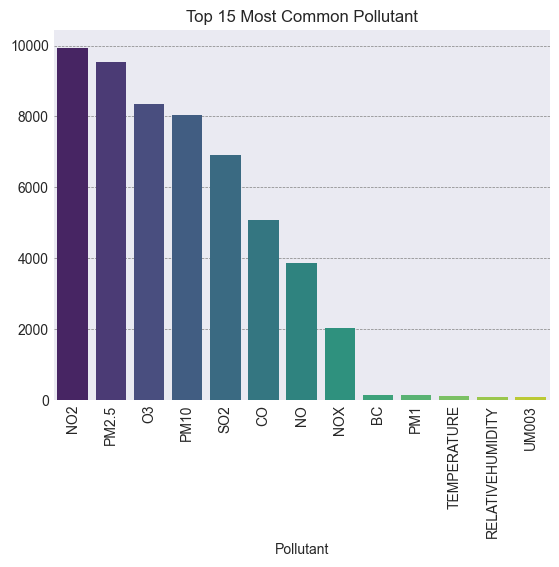

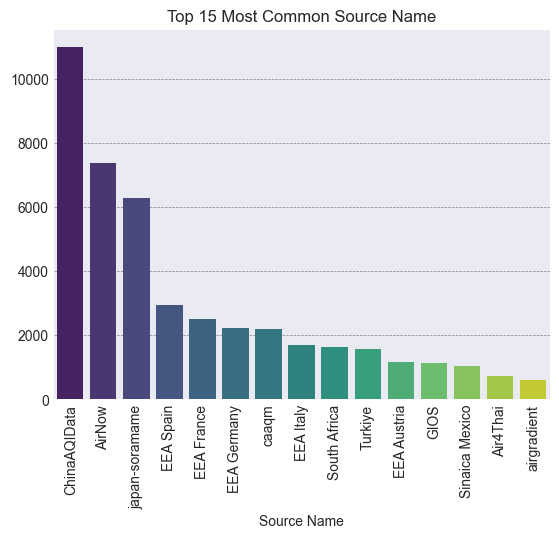

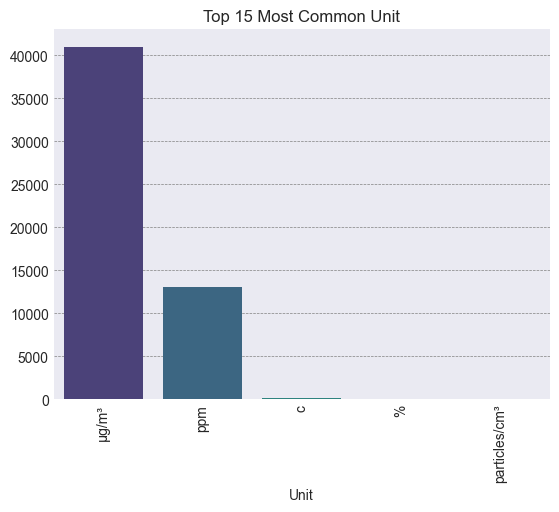

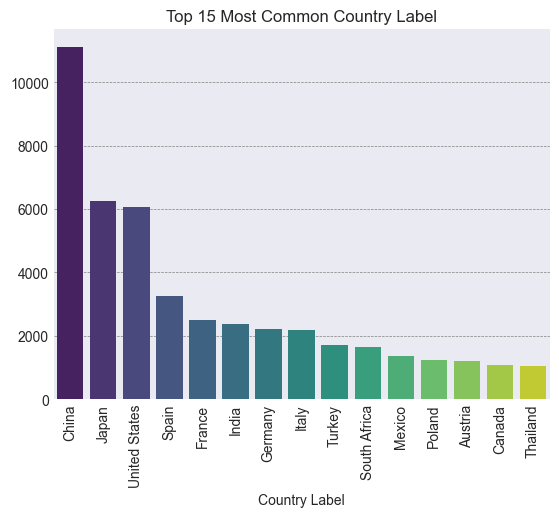

In [148]:
columns_to_visualize = ['Pollutant', 'Source Name', 'Unit', 'Country Label']
for col in columns_to_visualize:
    # Calculate the top 15 most common values and their counts
    top_values_count = df[col].value_counts().head(15)

    # Create a bar plot
    sns.barplot(x=top_values_count.index, y=top_values_count.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, which='both', axis='y')
    plt.title(f'Top 15 Most Common {col}')
    plt.show()

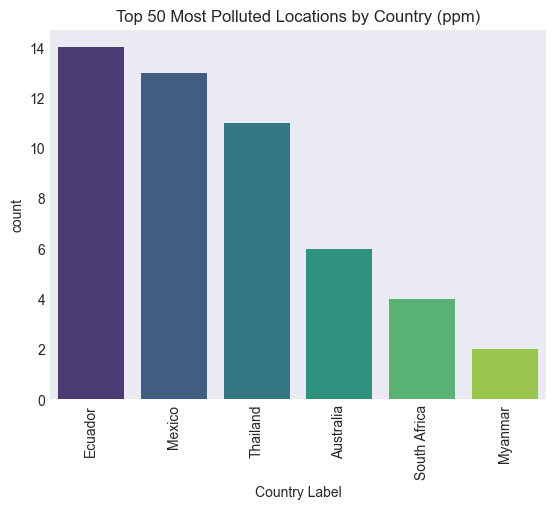

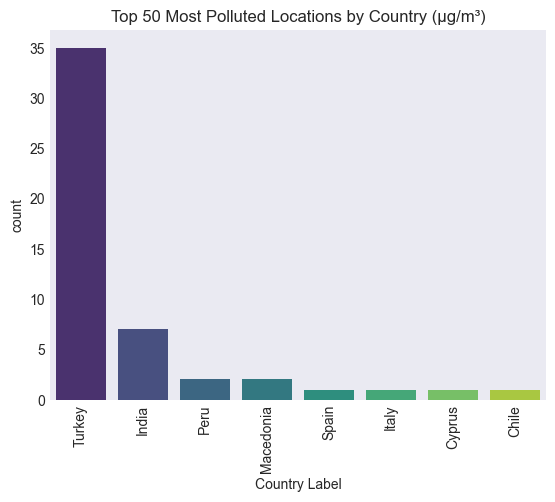

In [149]:
units_to_visualize = ['ppm', 'µg/m³']


for unit in units_to_visualize:
    
    top_polluted = df[df['Unit'] == unit].sort_values(by='Value', ascending=False).head(50)
    
   
    country_counts = top_polluted['Country Label'].value_counts()
    
    # Create a bar plot showing the number of top polluted locations by country for the current unit
    sns.barplot(x=country_counts.index, y=country_counts, palette='viridis')
    plt.title(f'Top 50 Most Polluted Locations by Country ({unit})')
    plt.xticks(rotation=90)
    plt.show()

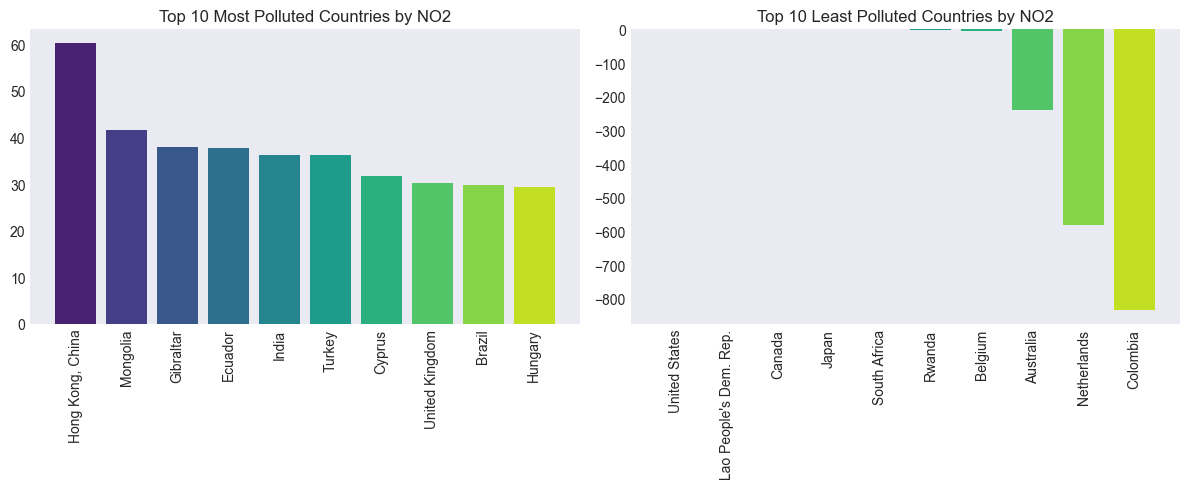

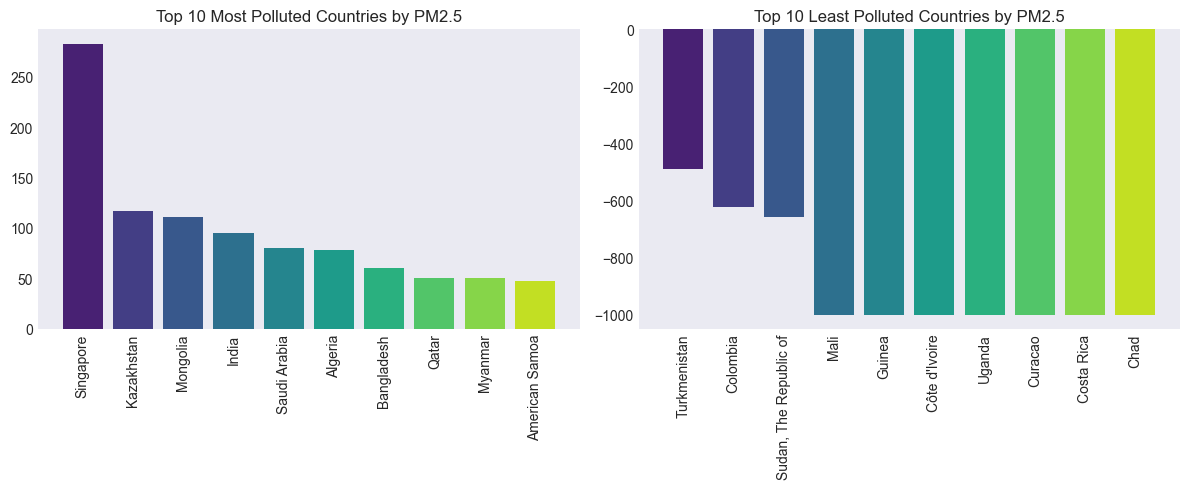

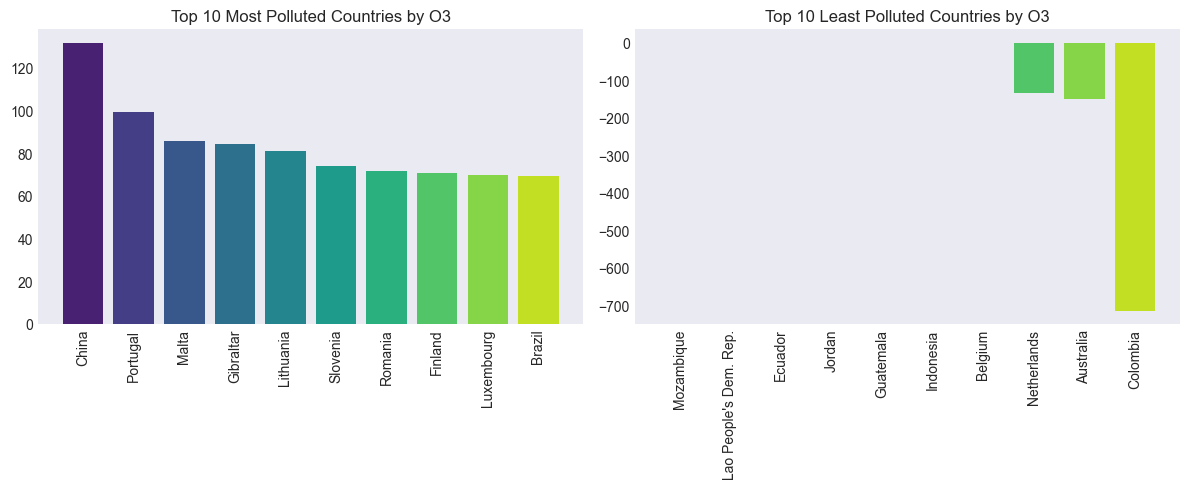

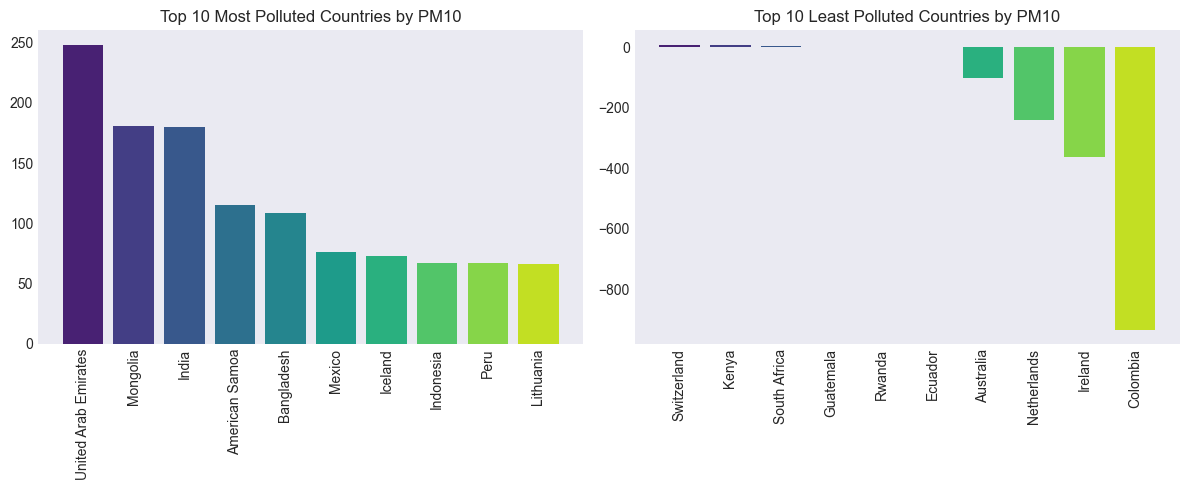

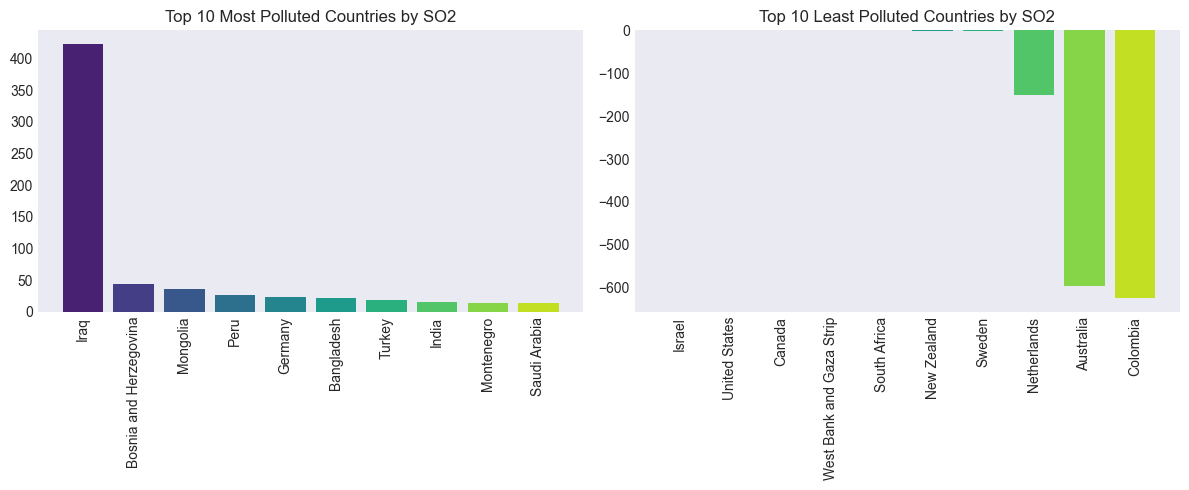

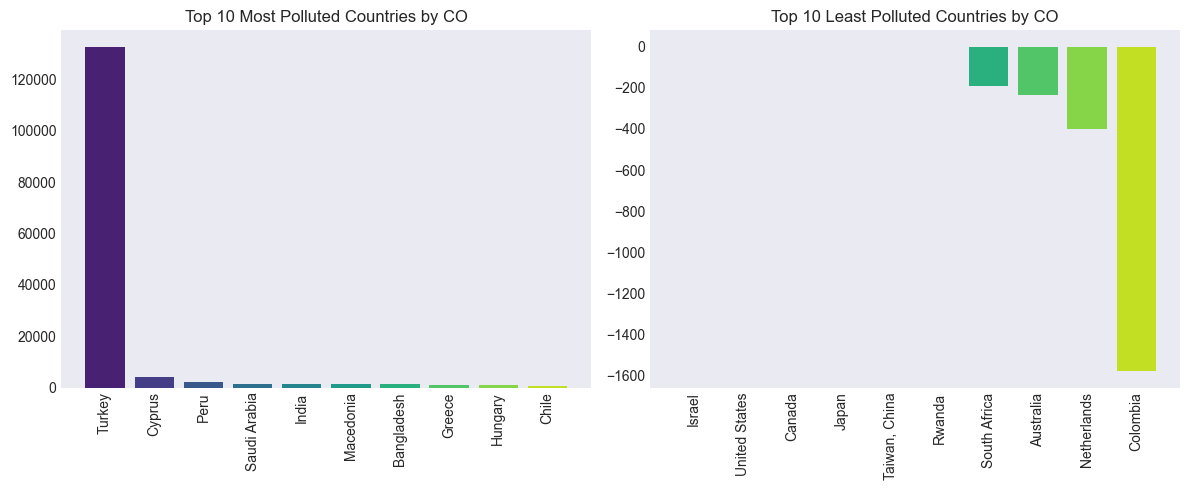

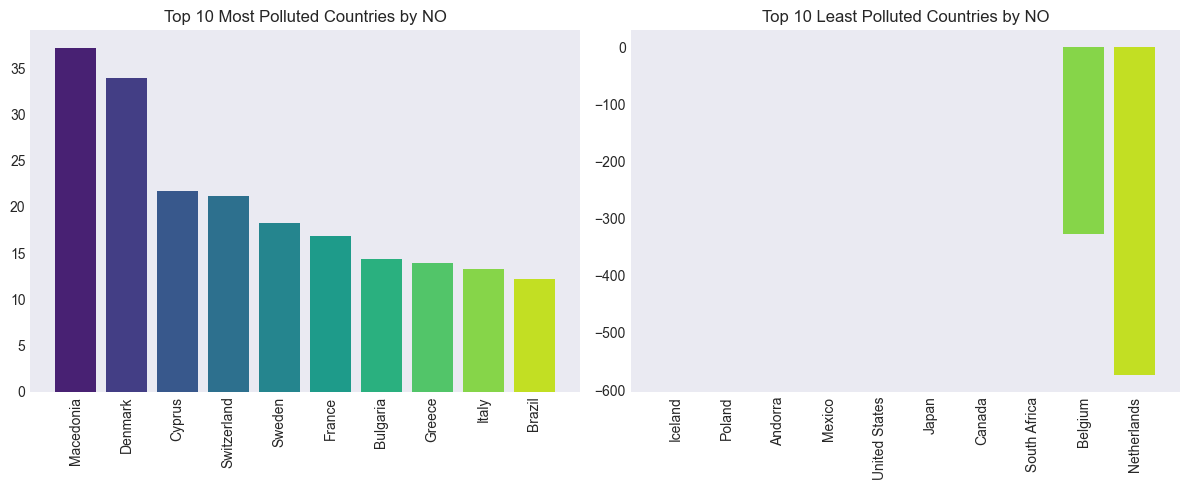

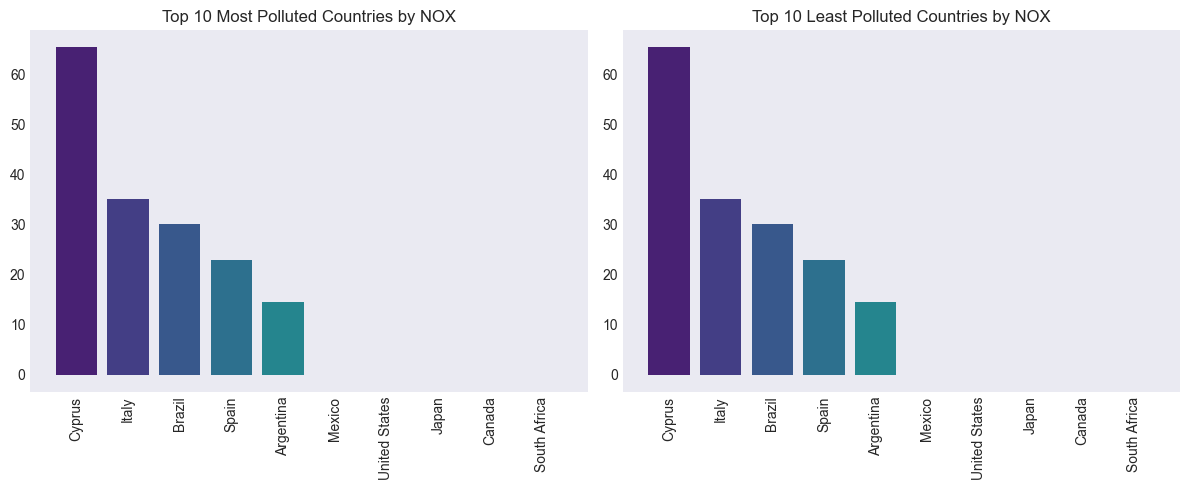

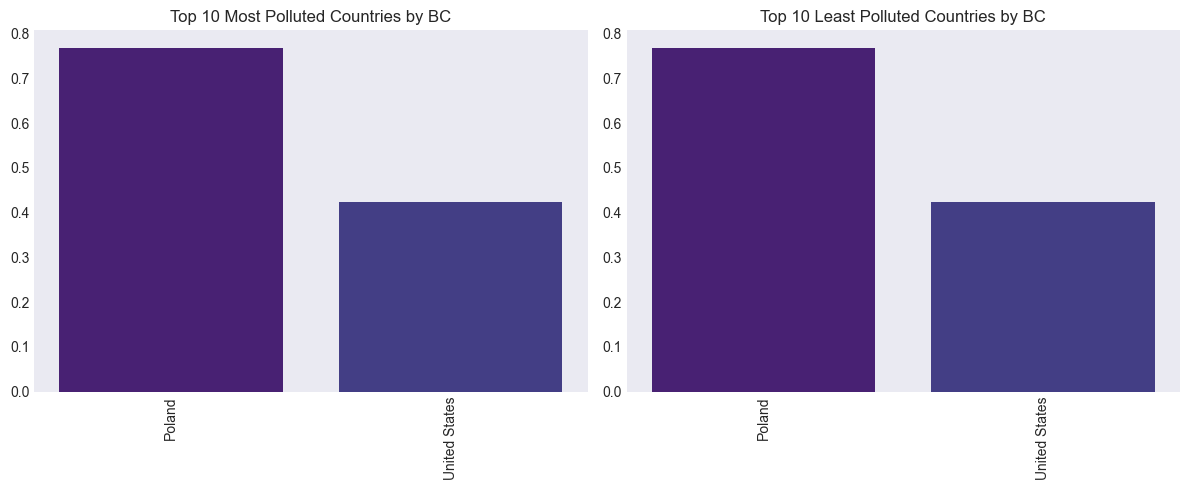

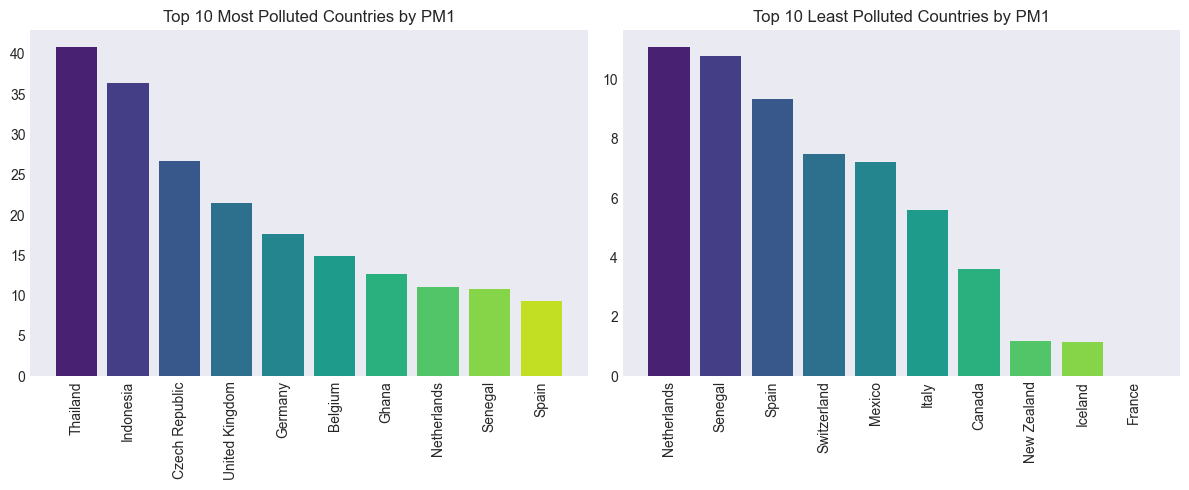

In [150]:
pollutants = ['NO2', 'PM2.5', 'O3', 'PM10', 'SO2', 'CO', 'NO', 'NOX', 'BC', 'PM1']

for pollutant in pollutants:
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    
    avg_pollution = df[df['Pollutant'] == pollutant].groupby('Country Label')['Value'].mean().sort_values(ascending=False)
    
    # Plot the top 10 most polluted countries
    axs[0].bar(x=avg_pollution.head(10).index, height=avg_pollution.head(10), color=sns.color_palette('viridis', 10))
    axs[0].set_title(f'Top 10 Most Polluted Countries by {pollutant}')
    axs[0].tick_params(axis='x', rotation=90)
    # Plot the top 10 least polluted countries
    axs[1].bar(x=avg_pollution.tail(10).index, height=avg_pollution.tail(10), color=sns.color_palette('viridis', 10))
    axs[1].set_title(f'Top 10 Least Polluted Countries by {pollutant}')
    axs[1].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

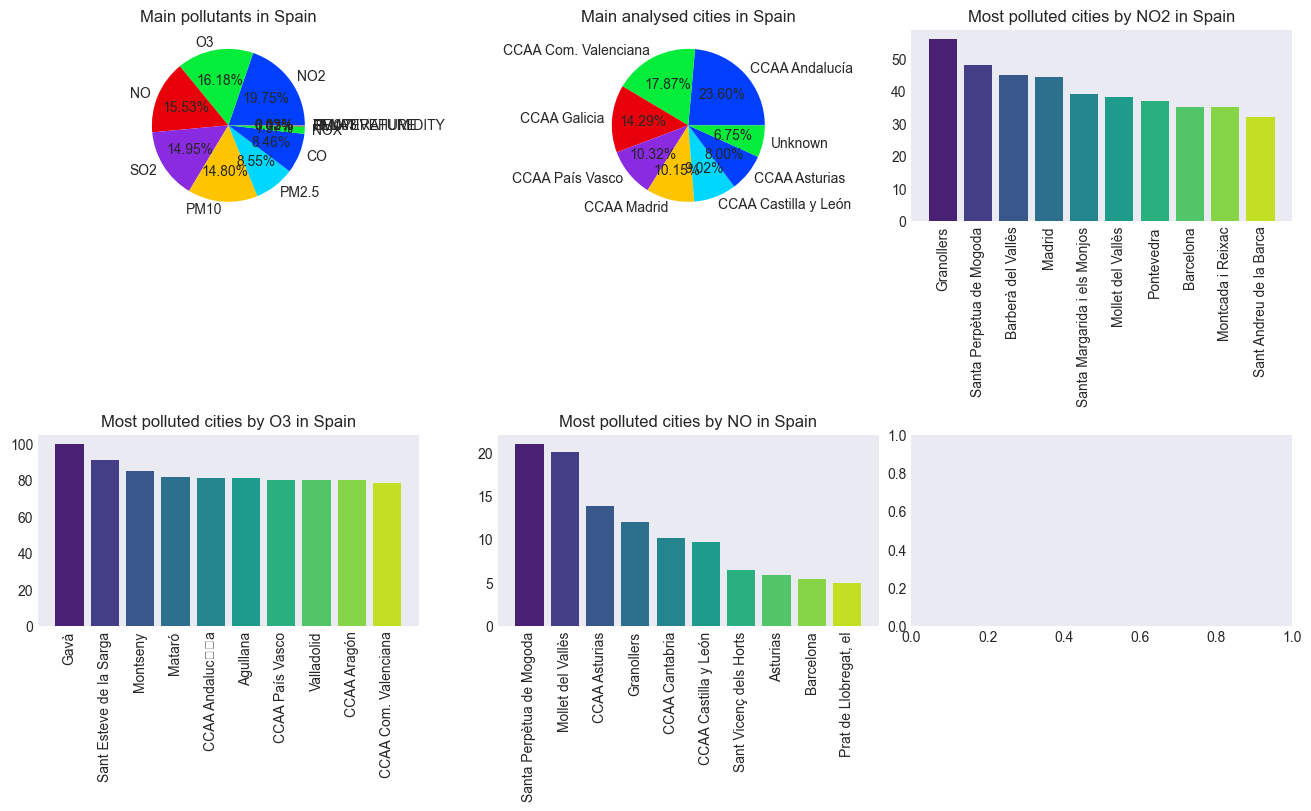

In [151]:
def create_bar_plot(ax, data, title):
    ax.bar(x=data.index, height=data, color=sns.color_palette('viridis', len(data)))
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=90)


country_to_search = 'Spain'
country_info = df[df['Country Label'] == country_to_search]


city_pollution_avg = country_info.groupby(['City', 'Pollutant'])['Value'].mean().unstack()

fig, axs = plt.subplots(2, 3, figsize=(13, 8), constrained_layout=True)

# Pie chart for main pollutants
country_pollutants = country_info['Pollutant'].value_counts()
axs[0, 0].pie(country_pollutants, labels=country_pollutants.index, autopct='%.2f%%')
axs[0, 0].set_title(f'Main pollutants in {country_to_search}')

# Pie chart for main analysed cities
country_cities = country_info['City'].value_counts().head(8)
axs[0, 1].pie(country_cities, labels=country_cities.index, autopct='%.2f%%')
axs[0, 1].set_title(f'Main analysed cities in {country_to_search}')

# Bar plots for most polluted cities by specific pollutants
for i, pollutant in enumerate(['NO2', 'O3', 'NO']):
    # Use the 'create_bar_plot' function defined above
    create_bar_plot(axs.flatten()[i + 2], city_pollution_avg[pollutant].sort_values(ascending=False).head(10),
                    f'Most polluted cities by {pollutant} in {country_to_search}')

plt.show()

In [152]:
NO2_countries = df[df['Pollutant'] == 'NO2'].groupby('Country Label')['Value'].mean().reset_index()



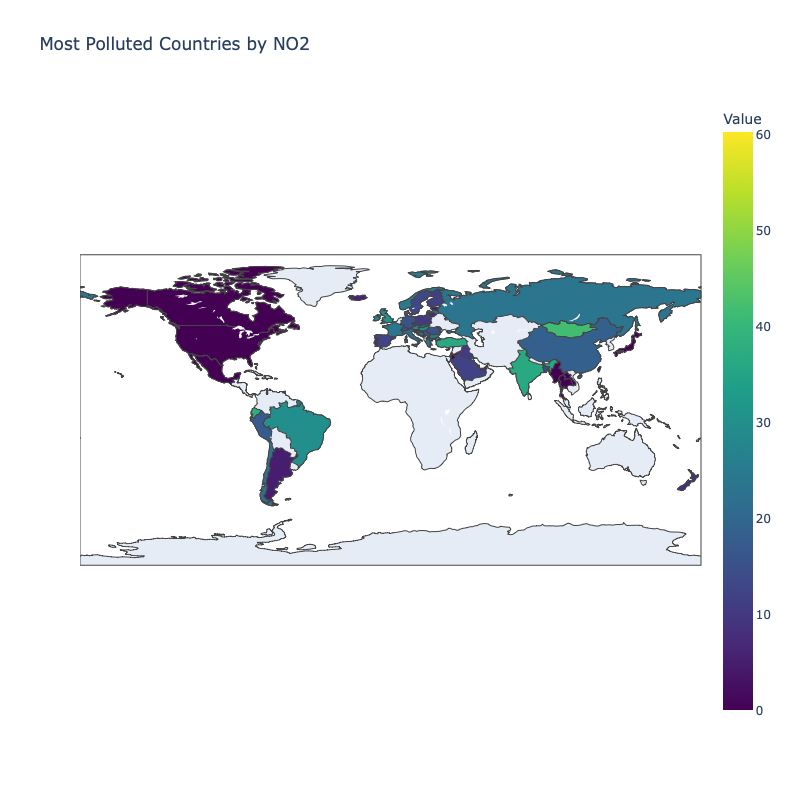

In [153]:
def plot_map(data, column, palette, width=800, height=600):
    fig = px.choropleth(data, locations="Country Label", locationmode='country names', 
                        color=column, hover_name="Country Label", 
                        title='Most Polluted Countries by NO2', hover_data=[column], 
                        color_continuous_scale=palette)
    
   
    fig.update_layout(width=width, height=height)
    
    fig.show()


plot_map(NO2_countries_positive, 'Value', 'viridis', width=1000, height=800)

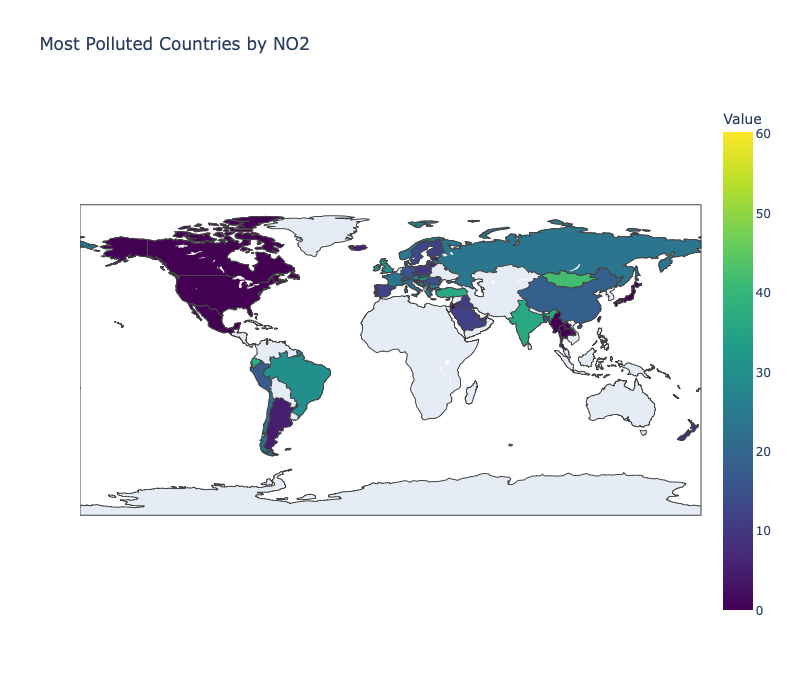

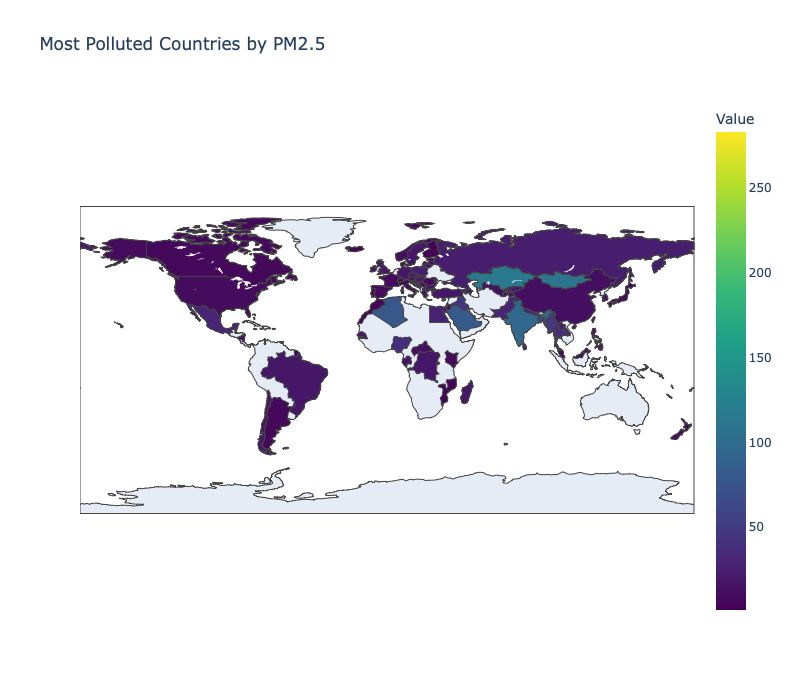

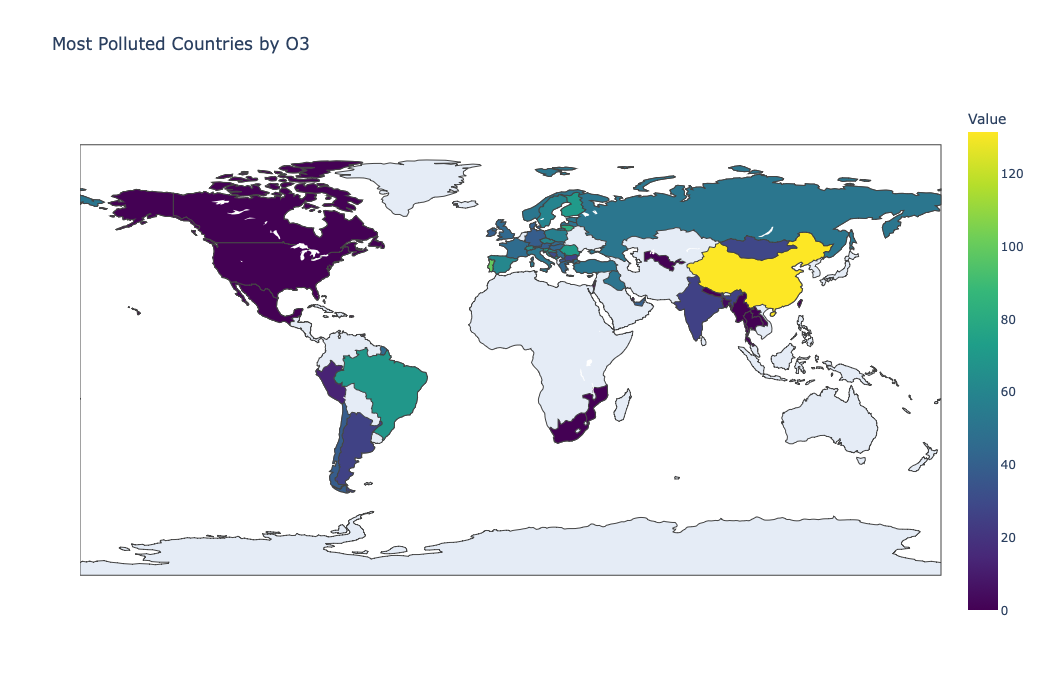

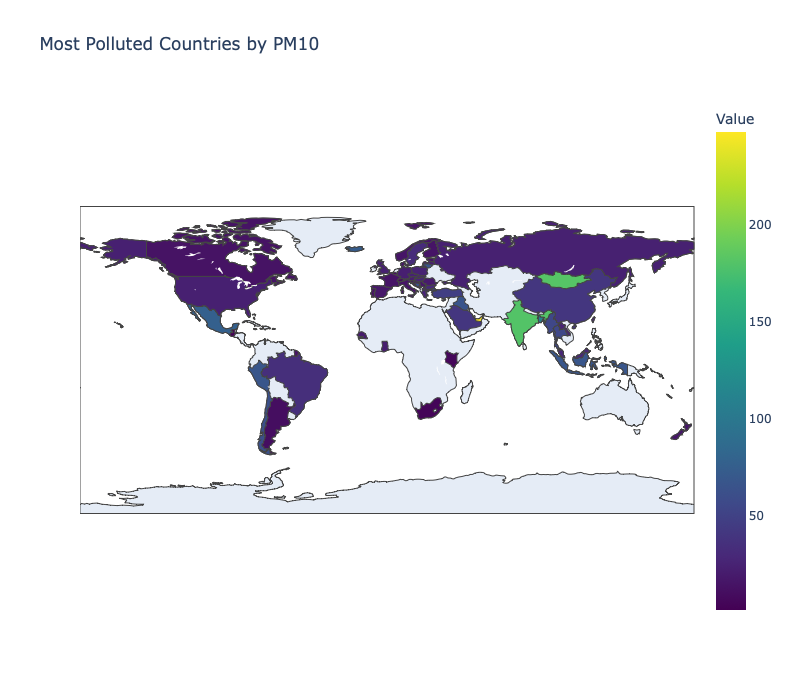

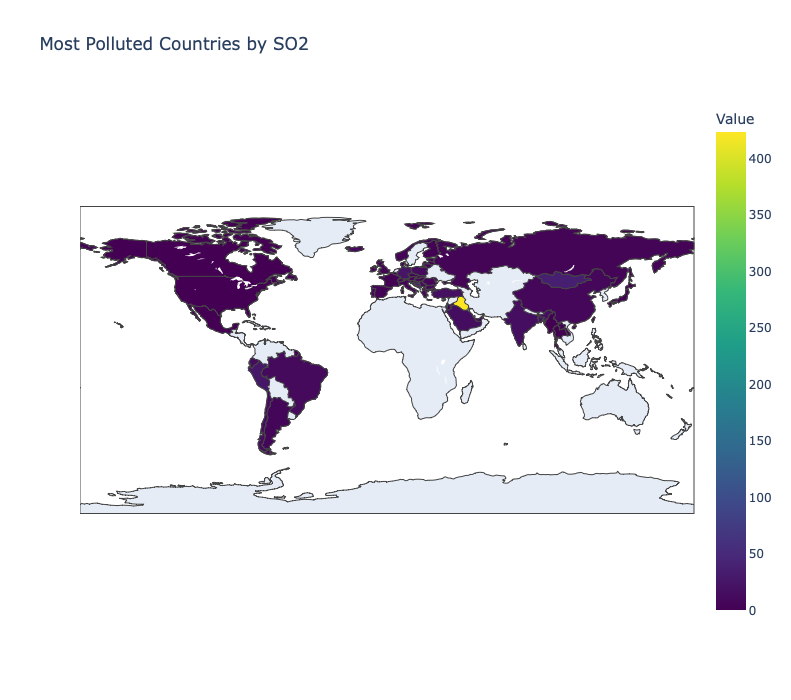

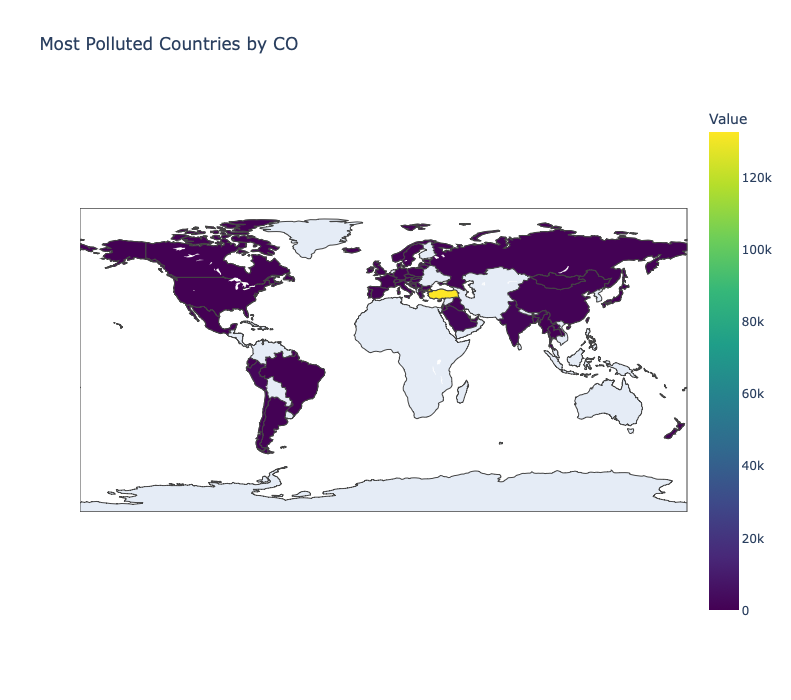

In [154]:
import plotly.express as px

def plot_pollutant_map(df, pollutant, palette='viridis', width=800, height=600):
    # Filter DataFrame for the specified pollutant and compute the mean 'Value' by country
    pollutant_data = df[df['Pollutant'] == pollutant].groupby('Country Label')['Value'].mean().reset_index()
    
    # Filter out countries with non-positive pollution values
    pollutant_data_positive = pollutant_data[pollutant_data['Value'] > 0]
    
    # Generate choropleth map for the pollutant
    fig = px.choropleth(pollutant_data_positive, locations="Country Label", locationmode='country names', 
                        color='Value', hover_name="Country Label", 
                        title=f'Most Polluted Countries by {pollutant}', hover_data=['Value'], 
                        color_continuous_scale=palette)
    
    # Update layout to make the map bigger
    fig.update_layout(width=width, height=height)
    
    fig.show()


pollutants = ['NO2', 'PM2.5', 'O3', 'PM10', 'SO2', 'CO']
for pollutant in pollutants:
    plot_pollutant_map(df, pollutant, width=1000, height=700)

## Conclusion
*In this analysis, we explored air pollution data across various countries, focusing on pollutants such as NO2, PM2.5, O3, PM10, SO2, and CO. By visualizing pollution levels through choropleth maps, we gained insights into the distribution of air pollution and identified regions with higher concentrations of pollutants.*

## Key Findings
*Regional Variations in Pollution: The analysis revealed significant regional disparities in air pollution levels. Countries in densely populated areas or with high industrial activity tended to exhibit higher pollution levels, particularly for NO2 and PM2.5.*

*Impact of Industrialization: Countries with rapid industrialization showed elevated levels of pollutants such as SO2 and CO. This indicates the influence of industrial activities on air quality and underscores the need for stringent environmental regulations.*

*Urban vs. Rural Pollution: Urban areas consistently displayed higher pollution levels compared to rural regions. Factors such as vehicular emissions, industrial facilities, and population density contribute to elevated pollution in urban centers.*

*Pollutant Trends Over Time: Analyzing pollutant levels over time could provide valuable insights into long-term trends and the effectiveness of pollution control measures. Further analysis could explore temporal variations and identify emerging patterns.*